In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns
# first imported all libraries


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [4]:
from sklearn.feature_selection import RFE

In [4]:
df=pd.read_csv("vehicles.csv")  # read the file

In [5]:
df.head() # checked data 

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [6]:
df.columns # check all column names 

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [7]:
df.shape # checked shape of data 

(258888, 26)

In [8]:
df.info()   # checked all data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [9]:
df.isnull().sum()  #checked all null values

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [10]:
df=df.drop(['details','member_since'],axis=1)   # deleted this columns because it contains null values more than 45% of data 

In [11]:
df.shape   # check shape

(258888, 24)

In [12]:
df=df.dropna() # droped all null values 

In [13]:
df.shape # check shape after deleted null values

(246050, 24)

In [14]:
df.isnull().sum()    # no null values 

ad_title                0
ad_description          0
slug                    0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

In [15]:
df['category'].unique()    # check all unique categories  

array(['Auto Parts & Accessories', 'Cars', 'Auto Services', 'Rentals',
       'Vans', 'Lorries & Trucks', 'Three Wheelers', 'Motorbikes',
       'Buses', 'Heavy Duty', 'Tractors', 'Bicycles',
       'Boats & Water Transport'], dtype=object)

In [16]:
df1=df.drop(df[(df['category']=='Auto Parts & Accessories') | (df['category']=='Auto Services') | (df['category']=='Rentals')].index)


# in this we can see there are 3 categories in that auto partes and accessories ,auto services and rentals are not vehicals so 
# we need to drop those data 

In [17]:
df1['category'].unique()  # after cleaning that data 

array(['Cars', 'Vans', 'Lorries & Trucks', 'Three Wheelers', 'Motorbikes',
       'Buses', 'Heavy Duty', 'Tractors', 'Bicycles',
       'Boats & Water Transport'], dtype=object)

In [18]:
df1['price'].head()   # in this we can see our value are in Rs 9000 these types of form so we need to convert  these into float

31      Rs 22,000,000
1349    Rs 14,500,000
1701    Rs 10,500,000
1702     Rs 6,500,000
1917    Rs 11,500,000
Name: price, dtype: object

In [19]:
df1['price'] = df1['price'].str.replace('Rs ', '').str.replace(',', '')
df1['price'] = df1['price'].apply(lambda x: np.nan if x == 'Negotiable' else float(x))    # in these we converted data onto float 

In [20]:
df=df.dropna()  # again droped null values 

In [21]:
df.shape

(246050, 24)

In [22]:
df2=df1.drop(['ad_title','ad_description','parent_category','geo_region','location','slug','title','area','type','timestamp','posted_date','deactivation_date','user'],axis=1)

# droped all irrelavent columns and not related data 

In [23]:
df2['properties'].unique()   # checked properties column

array(["{'Brand': 'Ssang Yong', 'Model': 'Rexton', 'Trim / Edition': 'Rexton Ultimate d/ca', 'Year of Manufacture': '2019', 'Condition': 'New', 'Transmission': 'Tiptronic', 'Body type': 'SUV / 4x4', 'Fuel type': 'Diesel', 'Engine capacity': '2,200 cc', 'Mileage': '0 km'}",
       "{'Brand': 'Toyota', 'Model': 'CHR', 'Year of Manufacture': '2017', 'Condition': 'Reconditioned', 'Transmission': 'Tiptronic', 'Body type': 'CoupÃ©/Sports', 'Fuel type': 'Petrol', 'Engine capacity': '1,200 cc', 'Mileage': '9,000 km'}",
       "{'Brand': 'Toyota', 'Model': 'Axio', 'Trim / Edition': 'Axio', 'Year of Manufacture': '2015', 'Condition': 'Reconditioned', 'Transmission': 'Automatic', 'Body type': 'Saloon', 'Fuel type': 'Hybrid', 'Engine capacity': '1,500 cc', 'Mileage': '24,000 km'}",
       ...,
       "{'Brand': 'Toyota', 'Model': 'Allion', 'Trim / Edition': '260', 'Year of Manufacture': '2009', 'Condition': 'Used', 'Transmission': 'Automatic', 'Body type': 'Saloon', 'Fuel type': 'Petrol', 'Engine 

In [24]:
Condition = []
Brand = []
Model = []
Mileage = []


for i in range(df2.shape[0]):
    dict_converted = ast.literal_eval(df2.iloc[i][-1])
    Condition.append(dict_converted['Condition'])

    if 'Brand' not in dict_converted:
        Brand.append('NaN')
    else:
        Brand.append(dict_converted['Brand'])

    if 'Model' not in dict_converted:
        Model.append('NaN')
    else:
        Model.append(dict_converted['Model'])

    if 'Mileage' not in dict_converted:
        Mileage.append(0)
    else:
        Mileage.append(dict_converted['Mileage'])

# in this we collected all relavent data present in the "properties" column

C:\Users\DELL\AppData\Local\Temp\ipykernel_7428\3849696138.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dict_converted = ast.literal_eval(df2.iloc[i][-1])


In [25]:

df2['Condition']=Condition
df2['Brand']=Brand
df2['Mileage']=Mileage
df2['Model']=Model

#created new columns with all those value 


In [26]:
df2

,price,category,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,Condition,Brand,Mileage,Model
31,22000000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Ssang Yong', 'Model': 'Rexton', 'Tr...",New,Ssang Yong,0 km,Rexton
1349,14500000.0,Cars,False,False,False,True,False,False,True,premium,"{'Brand': 'Toyota', 'Model': 'CHR', 'Year of M...",Reconditioned,Toyota,"9,000 km",CHR
1701,10500000.0,Cars,False,False,False,True,False,False,True,premium,"{'Brand': 'Toyota', 'Model': 'Axio', 'Trim / E...",Reconditioned,Toyota,"24,000 km",Axio
1702,6500000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Daihatsu', 'Model': 'Atrai Wagon', ...",Reconditioned,Daihatsu,"55,000 km",Atrai Wagon
1917,11500000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Mercedes Benz', 'Model': 'C180', 'Y...",Used,Mercedes Benz,"137,000 km",C180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258881,12985000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Toyota', 'Model': 'CHR', 'Trim / Ed...",Used,Toyota,"43,000 km",CHR
258883,1030000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",Used,Nissan,"140,000 km",March
258884,3550000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",Used,Toyota,"219,000 km",Allion
258886,7250000.0,Cars,False,False,False,True,False,False,False,premium,"{'Brand': 'Toyota', 'Model': 'Roomy', 'Trim / ...",Used,Toyota,"30,000 km",Roomy


In [27]:
df2=df2.drop(['properties'],axis=1)   # droped properties column because we collected data from proeprties

In [28]:
df2


,price,category,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,Condition,Brand,Mileage,Model
31,22000000.0,Cars,False,False,False,True,False,False,True,plus,New,Ssang Yong,0 km,Rexton
1349,14500000.0,Cars,False,False,False,True,False,False,True,premium,Reconditioned,Toyota,"9,000 km",CHR
1701,10500000.0,Cars,False,False,False,True,False,False,True,premium,Reconditioned,Toyota,"24,000 km",Axio
1702,6500000.0,Cars,False,False,False,True,False,False,True,plus,Reconditioned,Daihatsu,"55,000 km",Atrai Wagon
1917,11500000.0,Cars,False,False,False,True,False,False,True,plus,Used,Mercedes Benz,"137,000 km",C180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258881,12985000.0,Cars,False,False,False,False,False,False,False,free,Used,Toyota,"43,000 km",CHR
258883,1030000.0,Cars,False,False,False,False,False,False,False,free,Used,Nissan,"140,000 km",March
258884,3550000.0,Cars,False,False,False,False,False,False,False,free,Used,Toyota,"219,000 km",Allion
258886,7250000.0,Cars,False,False,False,True,False,False,False,premium,Used,Toyota,"30,000 km",Roomy


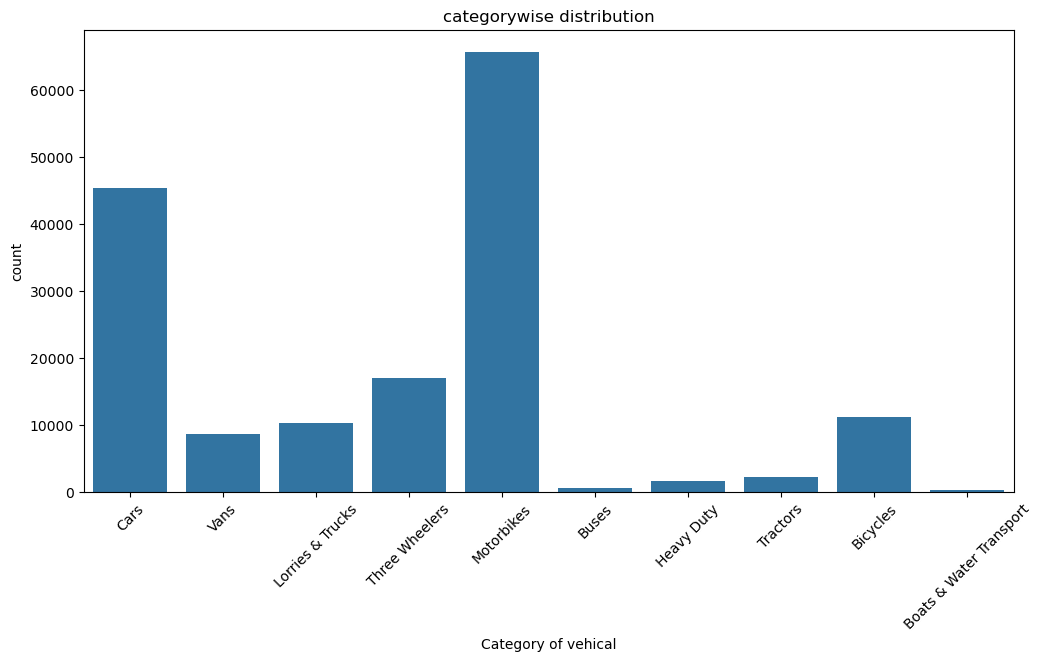

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='category',data=df2)
plt.title("categorywise distribution")
plt.xlabel("Category of vehical")
plt.ylabel("count")
plt.xticks(rotation=45) 
plt.show()

In [30]:
# from above plot we got idea about data distribution according to its category and we can observe we have maximum mumber od vehicals are motorbikes

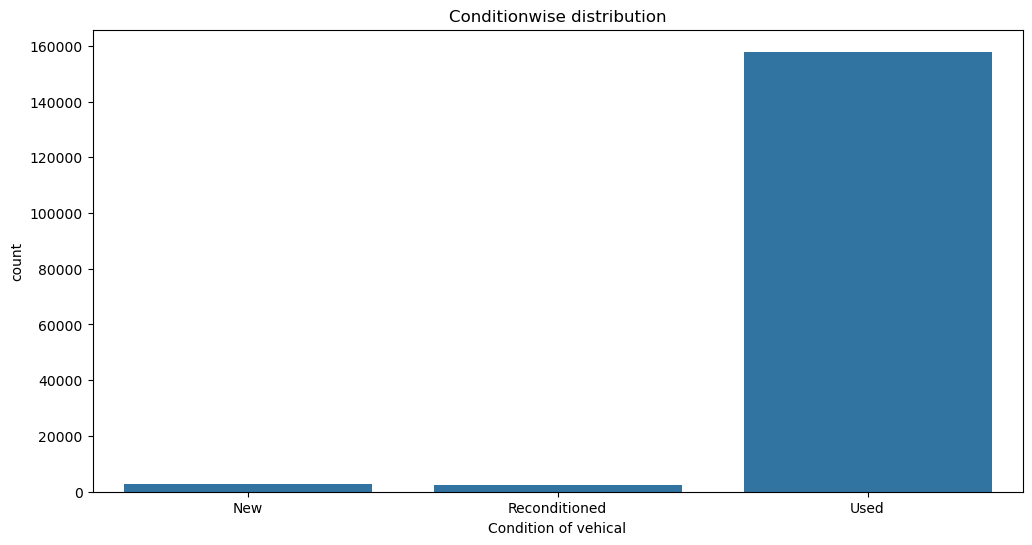

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='Condition',data=df2)
plt.title("Conditionwise distribution")
plt.xlabel("Condition of vehical")
plt.ylabel("count")
plt.show()

In [32]:
# from above graph we can observe there maximum vehicals are used vehicals 

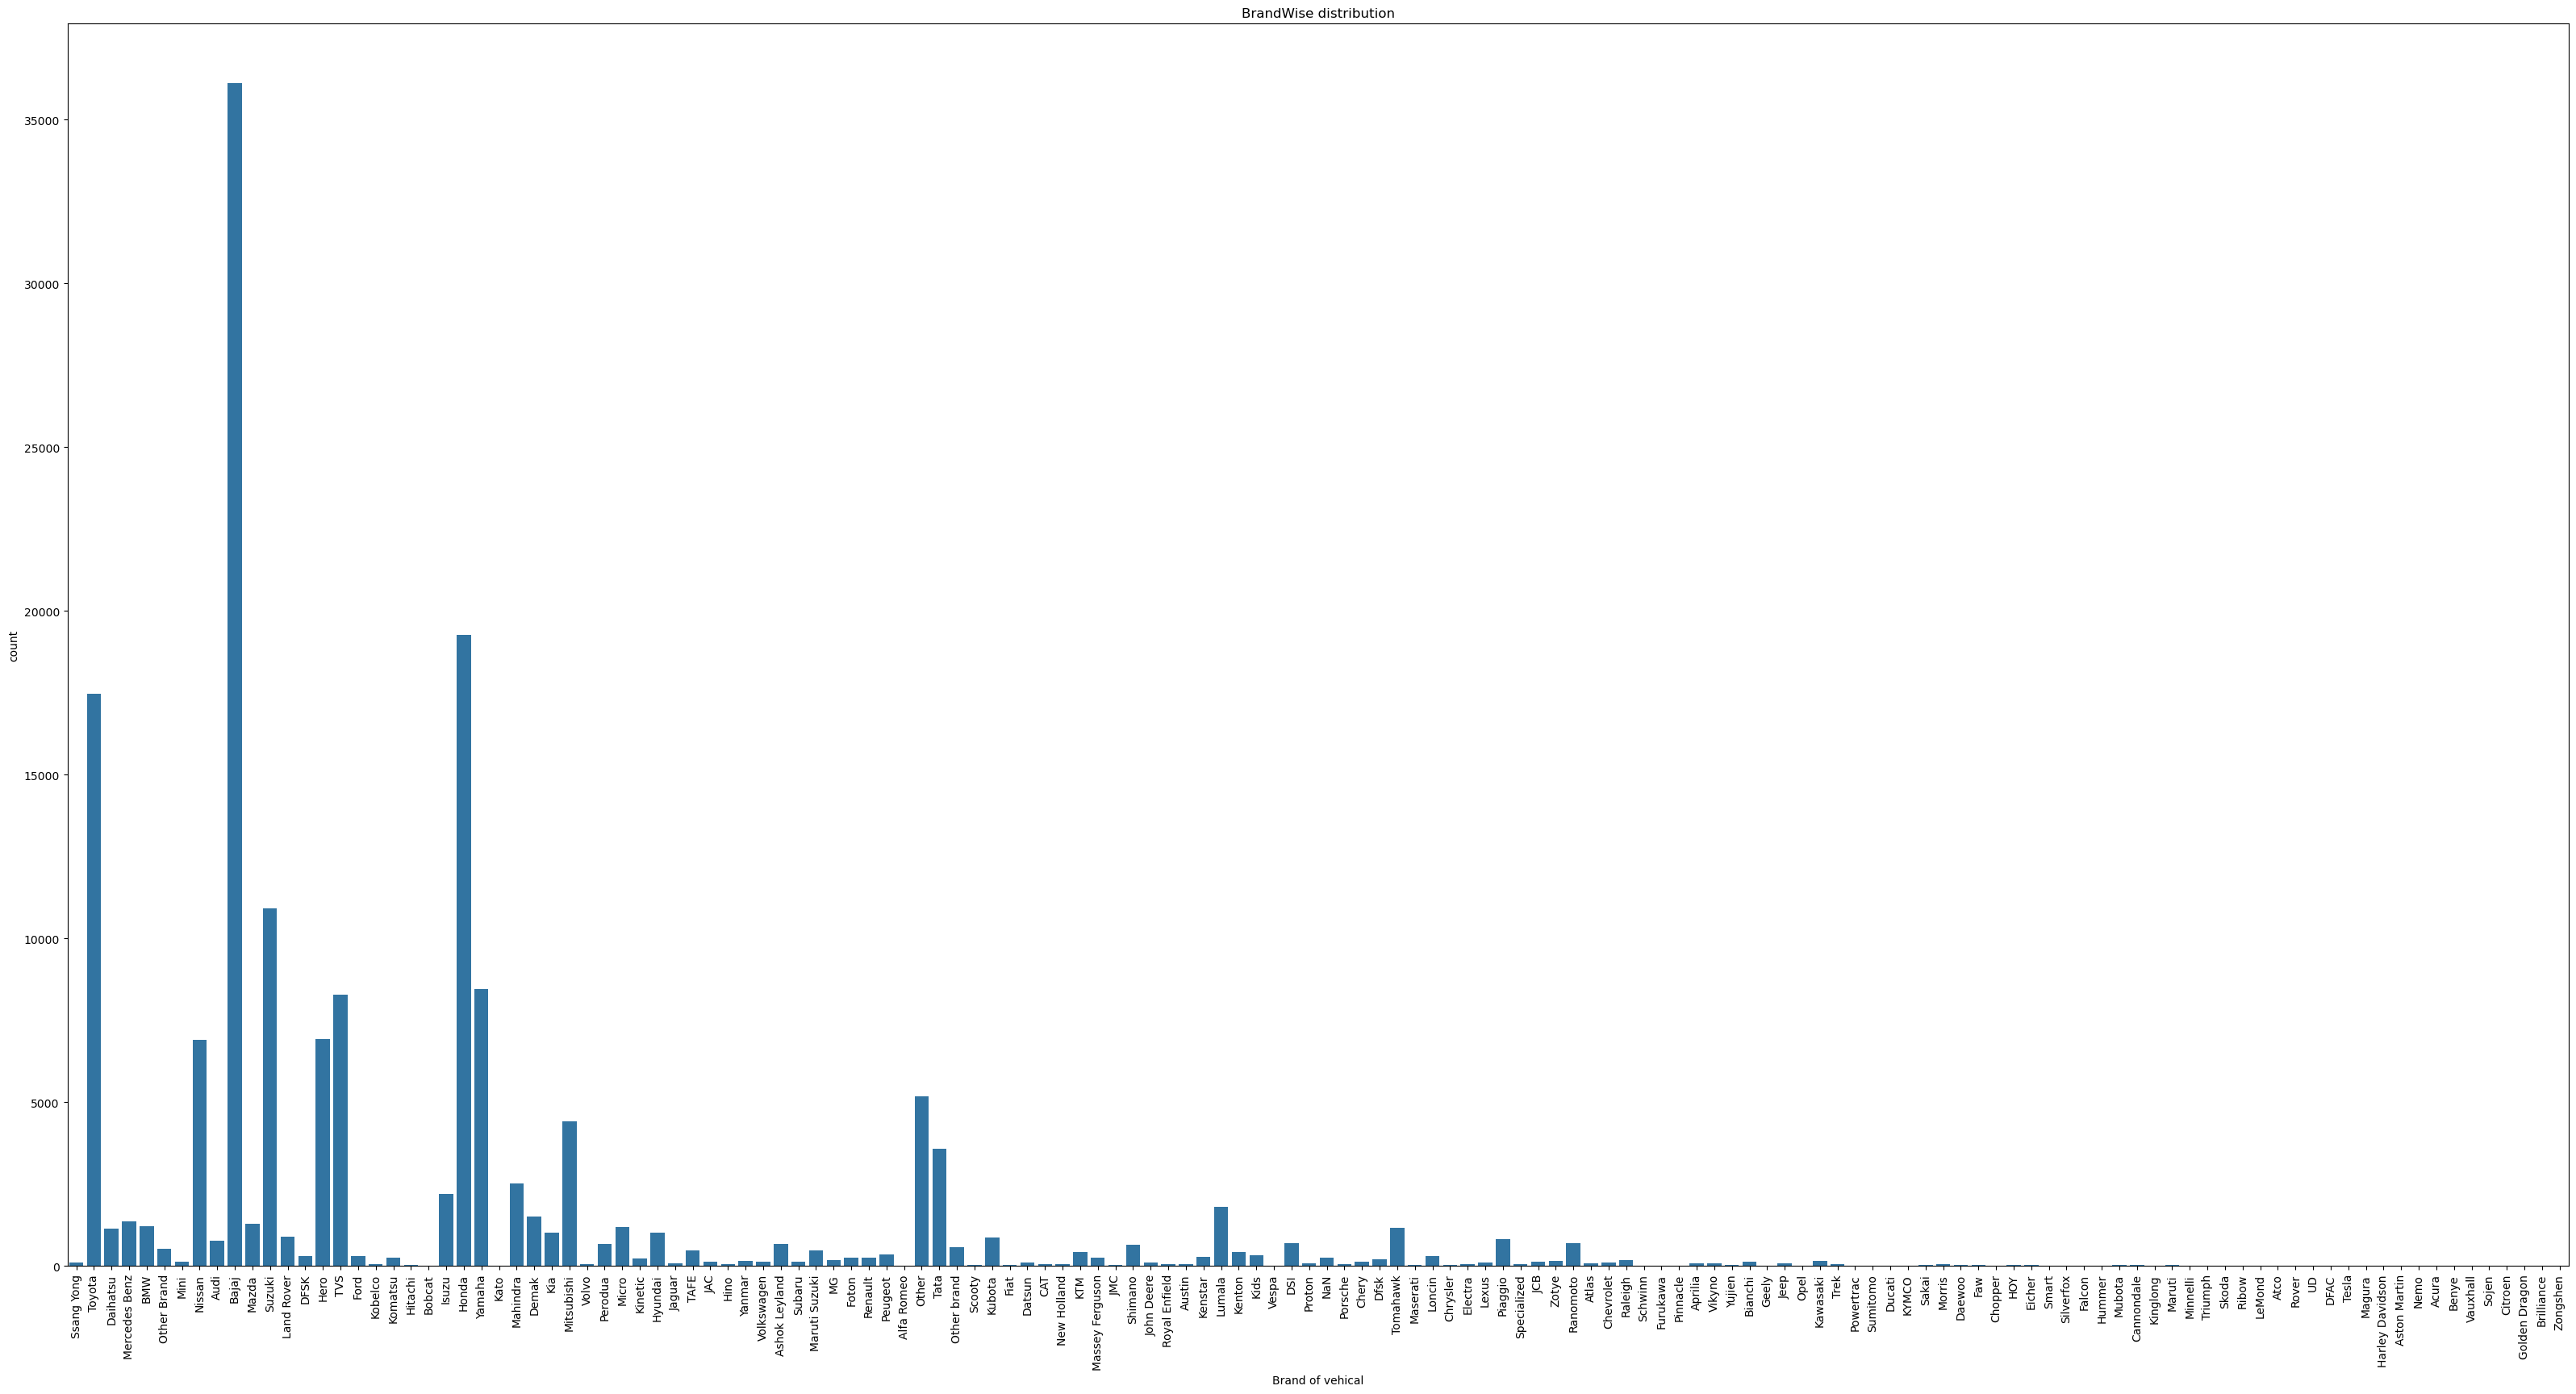

In [33]:
plt.figure(figsize=(40,20))
sns.countplot(x='Brand',data=df2)
plt.title("BrandWise distribution")
plt.xlabel("Brand of vehical")
plt.ylabel("count")

plt.xticks(rotation=90) 
plt.show()

In [34]:
df2['Mileage'] = df2['Mileage'].str.replace(' km', '').str.replace(',', '')     
# in mileage we have values with km so we change km to ''

In [35]:
df2['Mileage']=df2['Mileage'].astype(float)   # converted mileage column to float

In [36]:
# dropped unneccesary columns
df3=df2.drop(['is_delivery_free','is_doorstep_delivery','is_dsd_applicable','is_member','is_authorized_dealer','is_featured_member','is_verified','membership_level'],axis=1)

In [37]:
s=df3['Mileage'].median()  #we get median of mileage we dot


In [38]:
df3.head()

,price,category,Condition,Brand,Mileage,Model
31,22000000.0,Cars,New,Ssang Yong,0.0,Rexton
1349,14500000.0,Cars,Reconditioned,Toyota,9000.0,CHR
1701,10500000.0,Cars,Reconditioned,Toyota,24000.0,Axio
1702,6500000.0,Cars,Reconditioned,Daihatsu,55000.0,Atrai Wagon
1917,11500000.0,Cars,Used,Mercedes Benz,137000.0,C180


In [39]:
df3['Mileage']=df3['Mileage'].fillna(s)   # we replace null values with median

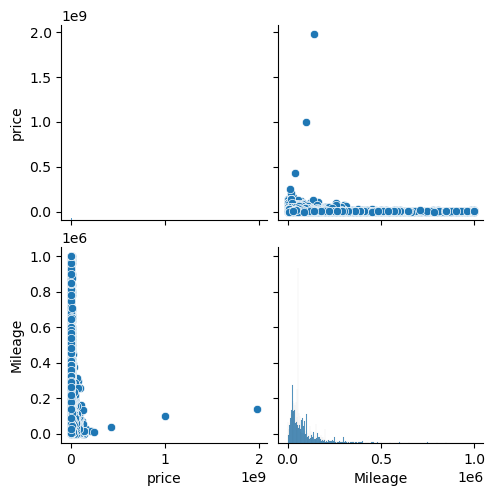

In [40]:
sns.pairplot(df3)

In [41]:
df3.isnull().sum()  #then we check all null values again

price        12
category      0
Condition     0
Brand         0
Mileage       0
Model         0
dtype: int64

In [42]:
df3=df3.dropna() # we droped null values

# ○	Encode categorical variables.

In [44]:
df3=pd.get_dummies(df3,columns=['category','Condition','Brand','Model'],drop_first=False).astype(int)   
# in this we did encoding of data of categorical data 

# ○ standardize numerical features 

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df3[['price']]=scaler.fit_transform(df3[['price']])  # we scale our target column

In [47]:
df3.head()

,price,Mileage,category_Bicycles,category_Boats & Water Transport,category_Buses,category_Cars,category_Heavy Duty,category_Lorries & Trucks,category_Motorbikes,category_Three Wheelers,...,Model_Zest,Model_Zoomer,Model_e-Golf,Model_e-NV200,Model_e2o,Model_eK Space,Model_eK Wagon,Model_i3,Model_i40,Model_i8
31,2.188633,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1349,1.323831,9000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1701,0.862604,24000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1702,0.401376,55000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1917,0.977911,137000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162821 entries, 31 to 258887
Columns: 1083 entries, price to Model_i8
dtypes: float64(1), int32(1082)
memory usage: 674.5 MB


In [49]:
df3.describe()

,price,Mileage,category_Bicycles,category_Boats & Water Transport,category_Buses,category_Cars,category_Heavy Duty,category_Lorries & Trucks,category_Motorbikes,category_Three Wheelers,...,Model_Zest,Model_Zoomer,Model_e-Golf,Model_e-NV200,Model_e2o,Model_eK Space,Model_eK Wagon,Model_i3,Model_i40,Model_i8
count,1.628210e+05,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,...,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000
mean,-9.077016e-18,81679.536761,0.068849,0.001585,0.003648,0.278631,0.009464,0.063204,0.403615,0.104163,...,0.000123,0.000227,0.000006,0.000061,0.000006,0.000006,0.000233,0.000141,0.000006,0.000233
std,1.000003e+00,88045.500378,0.253197,0.039775,0.060290,0.448327,0.096824,0.243331,0.490623,0.305473,...,0.011082,0.015073,0.002478,0.007837,0.002478,0.002478,0.015275,0.011884,0.002478,0.015275
min,-3.481191e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.192925e-01,33000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.685574e-01,55000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.219474e-02,98000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.279596e+02,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# O	Perform correlation analysis to identify relevant features

# ○	Apply feature selection techniques such as Recursive Feature Elimination (RFE) or Lasso Regression.

# O Model Training:

In [53]:
x=df3.iloc[:,1:]
y=df3.iloc[:,0] # we separated our target veriable and all data

In [54]:
y

31        2.188633
1349      1.323831
1701      0.862604
1702      0.401376
1917      0.977911
            ...   
258881    1.149141
258883   -0.229353
258884    0.061220
258886    0.487856
258887   -0.332553
Name: price, Length: 162821, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split   # imported train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)  # we splited data 

# Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression  # first we are going to apply multiple regression so we imported LinearRegression

In [59]:
regressor=LinearRegression()   

In [60]:
modd=regressor.fit(x_train,y_train)  # trained our model on trained data

In [61]:
y_pred=modd.predict(x_test) # predicted our data 

In [62]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error,mean_absolute_error,accuracy_score  # imported necessary lib 

In [63]:
r2_score(y_pred,y_test)   # calculated r-squared value then we got 0.8273746018043537

4.919922628077167e-06

In [64]:
mse = mean_squared_error(y_test, y_pred)
print(f"Regression Mean Squared Error: {mse}")    # mean squared error is 0.11978426515470153

Regression Mean Squared Error: 591038.5398775896


In [65]:
mean_absolute_error(y_pred,y_test)   # mean absolute error is 0.07480647352217129

14.031068664118823

In [66]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
d_regressor=DecisionTreeRegressor()       # now we are going to apply Decision tree

# decision tree

In [68]:
model=d_regressor.fit(x_train,y_train)  # trained our model 

In [69]:
y_pred=model.predict(x_test)   # calculated predicted values

In [70]:
print(f"Accuracy : {r2_score(y_pred,y_test)}")   # calculated r-squared value then we got 0.765463027104214

Accuracy : 0.7655890516295283


In [71]:
mse = mean_squared_error(y_test, y_pred)
print(f"Decison tree Mean Squared Error : {mse}")    # mean squared error is  0.1354066211808399

Decison tree Mean Squared Error : 0.136213793721653


# Random Forest 

In [73]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
# imported libraries for random forest

In [74]:
regressor = RandomForestRegressor(n_estimators=20, random_state=42)


In [75]:
regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=42)

In [76]:
y_pred= regressor.predict(x_test)


In [77]:
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse}")


Random Forest Mean Squared Error: 0.11978426515470153


In [78]:
print(f"Accuracy : {r2_score(y_pred,y_test)}")   # calculated r-squared value then we got 0.7855776632089642

Accuracy : 0.7855776632089642


# ------------------********************************----------------------------

In [80]:
df4 = df3

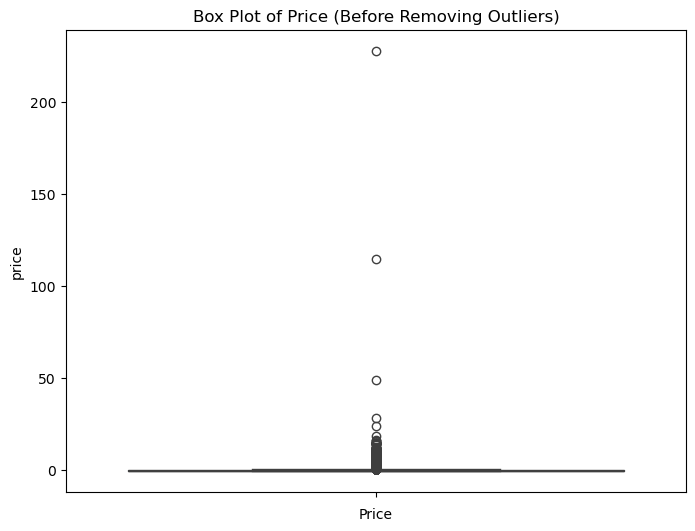

In [81]:
# Plot the box plot of the 'price' column before removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df4['price'])
plt.title('Box Plot of Price (Before Removing Outliers)')
plt.xlabel('Price')
plt.show()

In [82]:
    # Identify and remove outliers
    q1 = df4['price'].quantile(0.25)
    q3 = df4['price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df4 = df4[(df4['price'] >= lower_bound) & (df4['price'] <= upper_bound)]

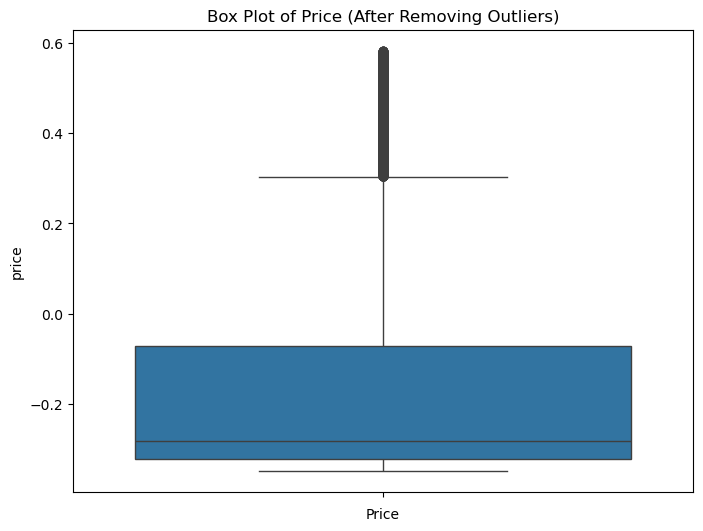

In [83]:
 # Plot the box plot of the 'price' column after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df4['price'])
plt.title('Box Plot of Price (After Removing Outliers)')
plt.xlabel('Price')
plt.show()

In [84]:
# Perform correlation analysis on numeric columns
num_cols = df4.select_dtypes(include=['int32', 'float32']).columns
corr_matrix = df4[num_cols].corr()
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                                   Mileage  category_Bicycles  \
Mileage                           1.000000          -0.083853   
category_Bicycles                -0.083853           1.000000   
category_Boats & Water Transport -0.011907          -0.011533   
category_Buses                    0.090033          -0.016407   
category_Cars                     0.249523          -0.153567   
...                                    ...                ...   
Model_eK Space                    0.000105          -0.000738   
Model_eK Wagon                   -0.002375          -0.003762   
Model_i3                               NaN                NaN   
Model_i40                        -0.000617          -0.000738   
Model_i8                               NaN                NaN   

                                  category_Boats & Water Transport  \
Mileage                                                  -0.011907   
category_Bicycles                                        -0

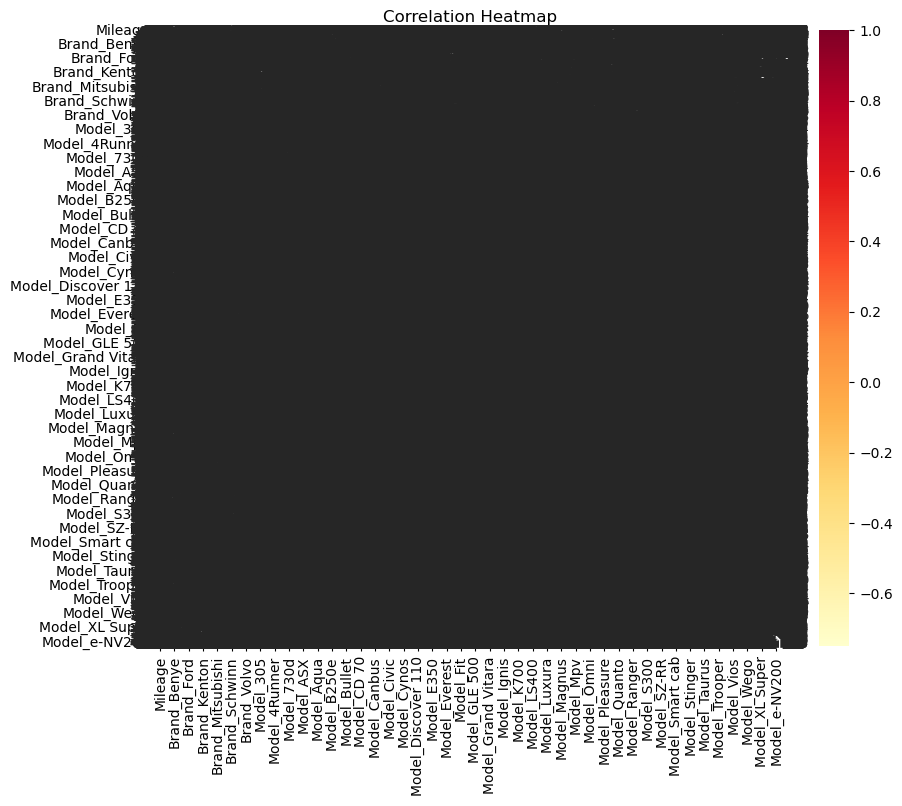

In [85]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.show()

In [ ]:
# Apply Recursive Feature Elimination (RFE)
if len(num_cols) >= 2:
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select+=10)
    X = df4[num_cols].values
    y = df4['price'].values
    rfe.fit(X, y)
    selected_features = num_cols[rfe.support_]
    print("Selected features:", selected_features)

In [ ]:
 # Split the data into features and target
X_train, X_test, y_train, y_test = train_test_split(df4[selected_features], df4['price'], test_size=0.2, random_state=42)

In [ ]:
# Train different regression models
models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Random Forest Regressor': RandomForestRegressor()
}
    
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

# Reduce the number of hyperparameter combinations

In [ ]:
# Reduce the number of hyperparameter combinations
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

# Use a smaller subset of the data for tuning
X_train_subset, _, y_train_subset, _ = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Parallelize the grid search
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_subset, y_train_subset)

print("Best hyperparameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

# Evaluate the final model

In [ ]:
# Evaluate the final model
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Final Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

In [ ]:
"""from sklearn.feature_selection import RFE

model = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(x, y)

# Select the important features
selected_features = x.columns[fit.support_]
selected_features"""

In [ ]:
"""from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x[selected_features], y, cv=5, scoring='neg_mean_squared_error')
    results[model_name] = cv_scores.mean()

# Display the results
results"""

# Case 2 : 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:

# Load the dataset
df = pd.read_csv('vehicles.csv')

In [13]:
# Handle missing and non-numeric values in price
df['price'] = df['price'].str.replace('Rs ', '').str.replace(',', '')
df['price'] = df['price'].apply(lambda x: np.nan if x == 'Negotiable' else float(x))

In [15]:
# Drop rows with missing values in price
df = df.dropna(subset=['price'])

In [17]:
# Handle missing values
df = df.dropna(subset=['ad_title', 'ad_description', 'details', 'title', 'type', 'timestamp', 'posted_date', 'deactivation_date', 'category', 'parent_category', 'location', 'geo_region', 'area', 'is_member', 'is_authorized_dealer', 'is_featured_member', 'is_verified'])

In [19]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['category'] = label_encoder.fit_transform(df['category'])
df['parent_category'] = label_encoder.fit_transform(df['parent_category'])
df['location'] = label_encoder.fit_transform(df['location'])
df['geo_region'] = label_encoder.fit_transform(df['geo_region'])
df['area'] = label_encoder.fit_transform(df['area'])

In [21]:
# Feature Selection
# Use PCA to reduce dimensionality
num_cols = df.select_dtypes(include=['int32', 'float64']).columns
X = df[num_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Perform PCA with full number of components
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

Explained Variance Ratio: [3.06255283e-01 2.27778440e-01 1.90220448e-01 1.43258467e-01
 1.32487363e-01 1.77442162e-34 0.00000000e+00]


In [25]:
# Determine the number of principal components to retain
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_retained = np.argmax(cumulative_variance >= 0.98) + 1
print(f"Number of principal components retained: {n_components_retained}")

Number of principal components retained: 5


In [27]:
# Transform the data using the retained principal components
X_pca = X_scaled @ pca.components_[:n_components_retained].T

In [29]:
X_pca

array([[ 1.95746902e+00,  1.77598130e+00, -1.42895140e-03,
         5.87635892e-01,  7.03888576e-01],
       [ 1.77095107e+00,  9.68069028e-01,  2.50618018e-02,
        -3.60957072e-03,  2.64753674e-01],
       [ 1.56250733e+00,  7.93575229e-01, -1.51187373e-01,
        -3.02904483e-01,  2.31221252e-01],
       ...,
       [ 1.69069009e+00, -6.63375096e-01,  3.99278781e-01,
        -8.95091399e-01, -7.30069195e-01],
       [ 1.84774559e+00, -4.17839463e-01,  4.99841625e-01,
        -6.12981793e-01, -6.33205923e-01],
       [-5.99758836e-01, -7.47622961e-01,  1.00147136e+00,
        -4.55922213e-01,  1.87954094e+00]])

In [31]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [33]:
# Clustering
# Apply K-means clustering


sil_scores = []
ch_scores = []
db_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)
    ch_score = calinski_harabasz_score(X_pca, labels)
    db_score = davies_bouldin_score(X_pca, labels)
    sil_scores.append(sil_score)
    ch_scores.append(ch_score)
    db_scores.append(db_score)

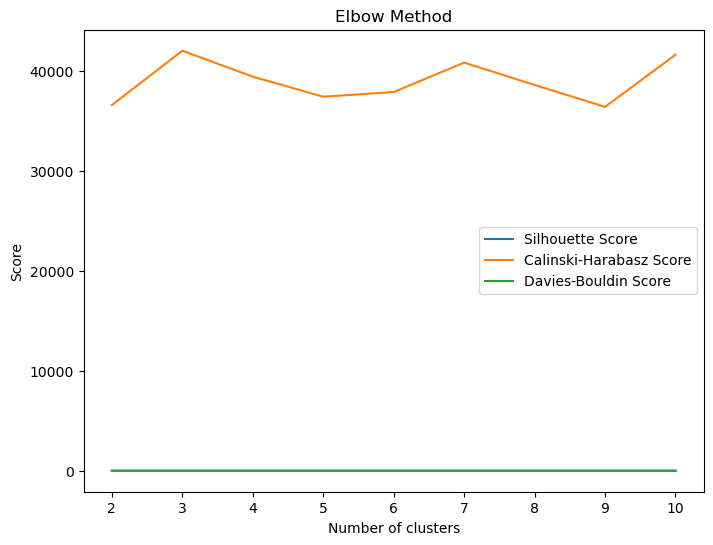

In [34]:
# Elbow method to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, label='Silhouette Score')
plt.plot(range(2, 11), ch_scores, label='Calinski-Harabasz Score')
plt.plot(range(2, 11), db_scores, label='Davies-Bouldin Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.legend()
plt.show()

In [35]:
# Select the optimal number of clusters based on the Elbow method
optimal_clusters = sil_scores.index(max(sil_scores)) + 2
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 2


In [36]:
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(X_pca)
df['cluster'] = labels

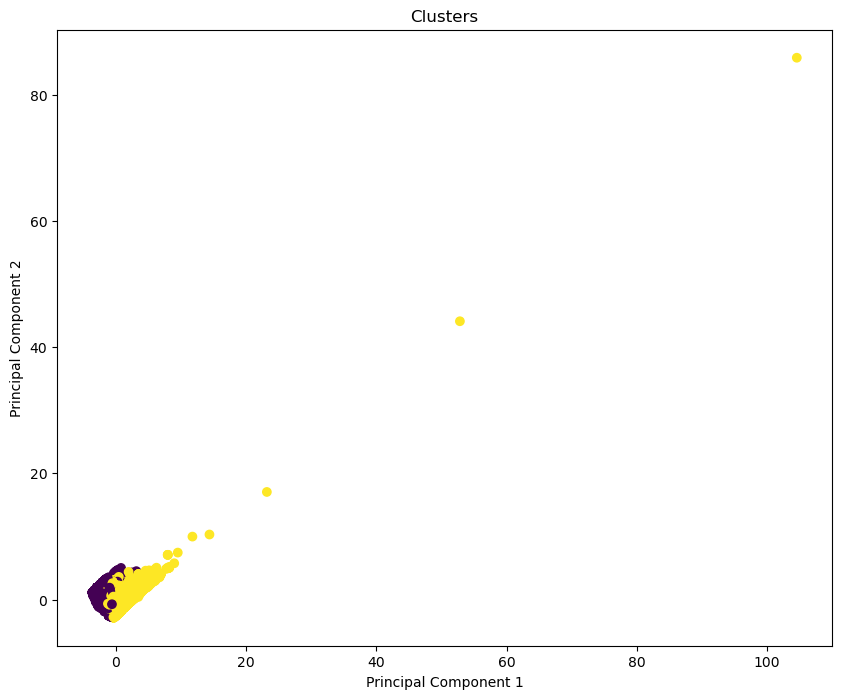

In [37]:

# Cluster Analysis
# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.show()


In [38]:
# Describe the characteristics of each cluster
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster].describe())
    print()

Cluster 0:
          type         price      category  parent_category      location  \
count  30837.0  3.083700e+04  30837.000000          30837.0  30837.000000   
mean       0.0  1.659470e+06      2.875896              0.0    123.070013   
std        0.0  2.929806e+06      1.088359              0.0     56.029149   
min        0.0  2.000000e+00      0.000000              0.0      4.000000   
25%        0.0  2.800000e+05      2.000000              0.0     96.000000   
50%        0.0  5.800000e+05      3.000000              0.0    123.000000   
75%        0.0  1.775000e+06      3.000000              0.0    171.000000   
max        0.0  7.750000e+07      5.000000              0.0    203.000000   

         geo_region          area  cluster  
count  30837.000000  30837.000000  30837.0  
mean      14.932159     13.217498      0.0  
std        4.642178      7.273376      0.0  
min        0.000000      0.000000      0.0  
25%       15.000000     11.000000      0.0  
50%       15.000000     1

In [39]:
# Identify patterns and insights
print("Insights:")
for cluster in range(optimal_clusters):
    cluster_data = df[df['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(f"- Average 'is_member': {cluster_data['is_member'].mean()}")
    print(f"- Average 'is_authorized_dealer': {cluster_data['is_authorized_dealer'].mean()}")
    print(f"- Average 'is_featured_member': {cluster_data['is_featured_member'].mean()}")
    print(f"- Average 'is_verified': {cluster_data['is_verified'].mean()}")
    print()

Insights:
Cluster 0:
- Average 'is_member': 0.06271686610240944
- Average 'is_authorized_dealer': 0.0
- Average 'is_featured_member': 0.0
- Average 'is_verified': 0.029672147096021013

Cluster 1:
- Average 'is_member': 0.30484608664371243
- Average 'is_authorized_dealer': 0.0003768607499528924
- Average 'is_featured_member': 0.00011991023862137485
- Average 'is_verified': 0.19585624475392707



# Section 3: Geographical Analysis of Demand and Supply

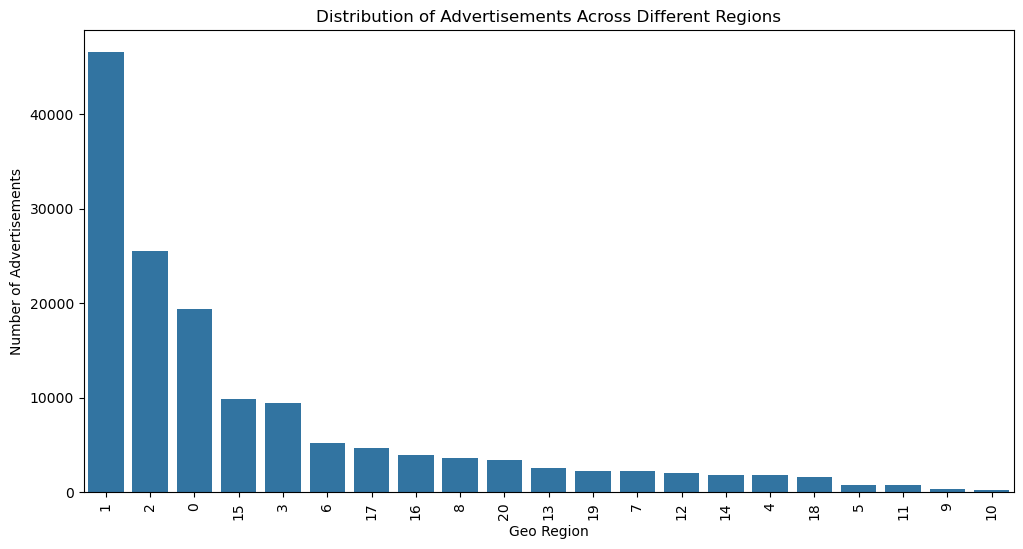

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns



# Select relevant columns
columns_of_interest = ['category', 'location', 'geo_region']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Visualize the distribution of advertisements across different regions
plt.figure(figsize=(12, 6))
sns.countplot(data=df_subset, x='geo_region', order=df_subset['geo_region'].value_counts().index)
plt.title('Distribution of Advertisements Across Different Regions')
plt.xlabel('Geo Region')
plt.ylabel('Number of Advertisements')
plt.xticks(rotation=90)
plt.show()

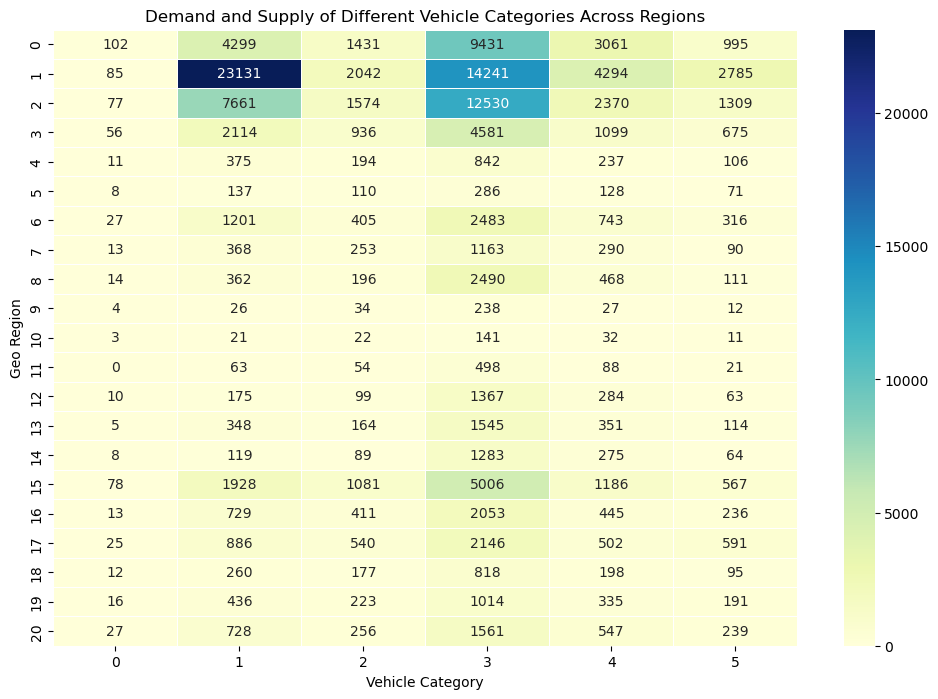

Top regions with the highest number of advertisements:
geo_region
1     46578
2     25521
0     19319
15     9846
3      9461
6      5175
17     4690
16     3887
8      3641
20     3358
Name: count, dtype: int64


In [50]:
# Identify regions with high demand and supply
# Assuming 'category' can be used to identify different types of vehicles
region_demand_supply = df_subset.groupby(['geo_region', 'category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(region_demand_supply, cmap="YlGnBu", linewidths=.5, annot=True, fmt='d')
plt.title('Demand and Supply of Different Vehicle Categories Across Regions')
plt.xlabel('Vehicle Category')
plt.ylabel('Geo Region')
plt.show()

# Identify top regions with high demand and supply
top_regions = df_subset['geo_region'].value_counts().head(10)
print("Top regions with the highest number of advertisements:")
print(top_regions)

# 3.	Temporal Analysis:

C:\Users\DELL\AppData\Local\Temp\ipykernel_736\1681494052.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['posted_date'].dt.to_period('M')


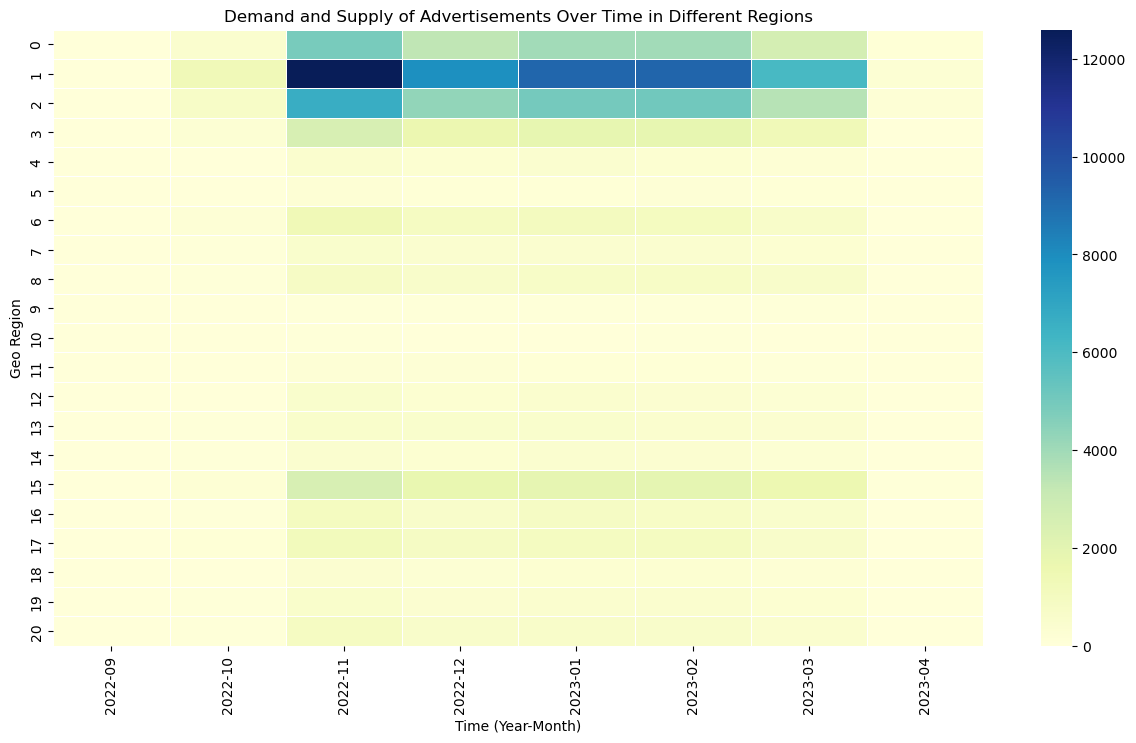

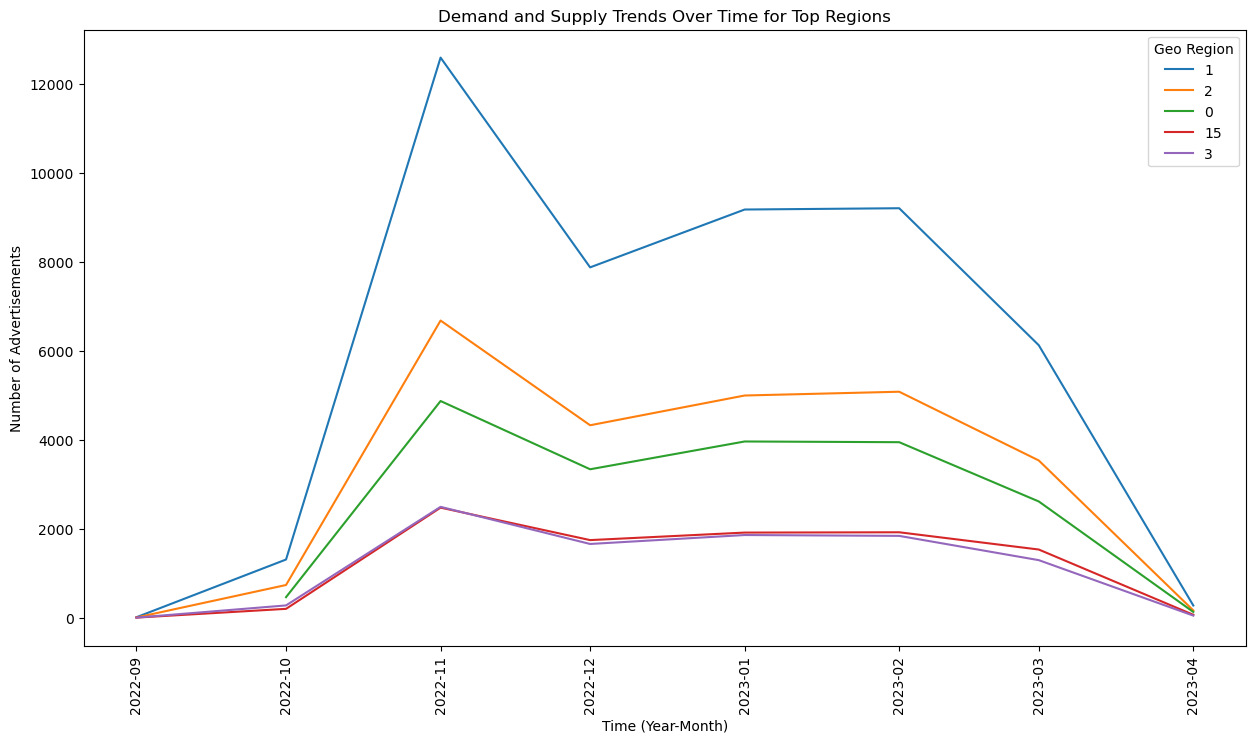

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


# Convert the 'date_posted' column to datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract year and month from 'date_posted'
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['year_month'] = df['posted_date'].dt.to_period('M')

# Select relevant columns
columns_of_interest = ['category', 'location', 'geo_region', 'year', 'month', 'year_month']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Group by 'year_month' and 'geo_region' to count the number of advertisements
time_region_demand_supply = df_subset.groupby(['year_month', 'geo_region']).size().unstack(fill_value=0)

# Visualize the demand and supply over time in different regions
plt.figure(figsize=(15, 8))
sns.heatmap(time_region_demand_supply.T, cmap="YlGnBu", linewidths=.5, annot=False)
plt.title('Demand and Supply of Advertisements Over Time in Different Regions')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Geo Region')
plt.xticks(rotation=90)
plt.show()

# Visualize trends for top regions
top_regions = df['geo_region'].value_counts().head(5).index  # Get top 5 regions
plt.figure(figsize=(15, 8))
for region in top_regions:
    region_data = df_subset[df_subset['geo_region'] == region].groupby('year_month').size()
    plt.plot(region_data.index.to_timestamp(), region_data, label=region)

plt.title('Demand and Supply Trends Over Time for Top Regions')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Advertisements')
plt.legend(title='Geo Region')
plt.xticks(rotation=90)
plt.show()

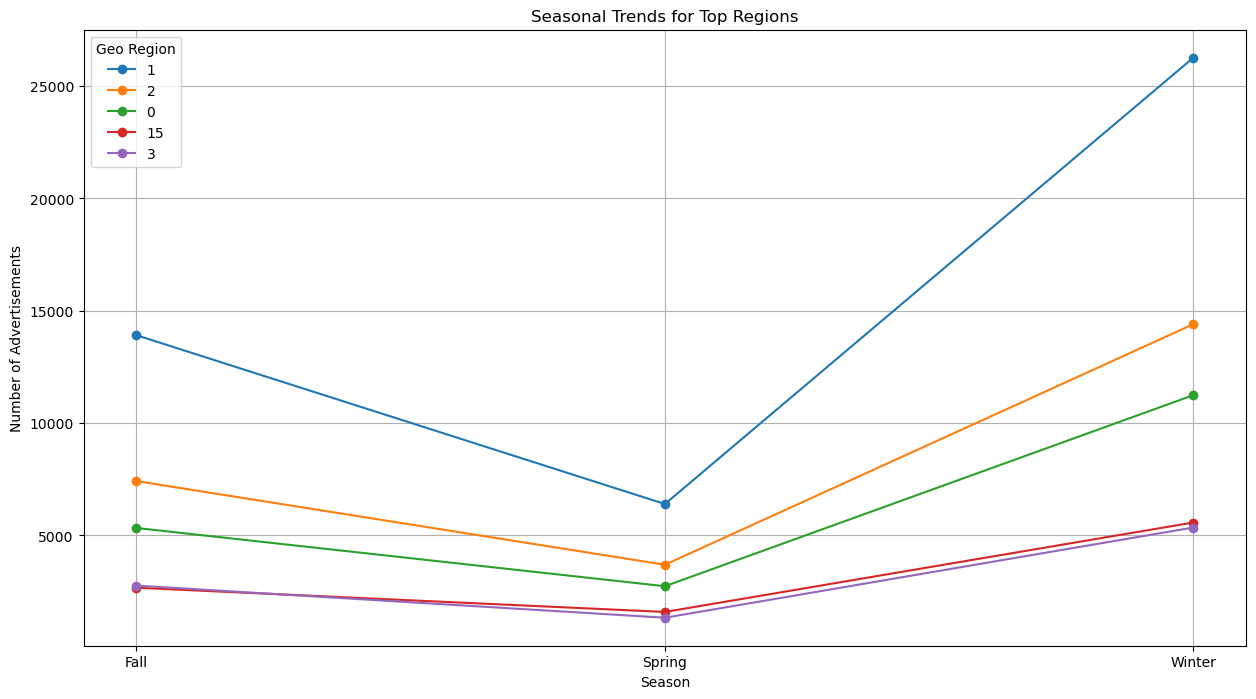

In [56]:

# Convert the 'date_posted' column to datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract year, month, and season from 'date_posted'
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month

# Define seasons
df['season'] = df['posted_date'].dt.month % 12 // 3 + 1
df['season'] = df['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Select relevant columns
columns_of_interest = ['category', 'location', 'geo_region', 'year', 'month', 'season']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Group by 'month' to count the number of advertisements and identify trends
monthly_ads = df_subset.groupby('month').size()



# Group by 'season' to count the number of advertisements and identify seasonal patterns
seasonal_ads = df_subset.groupby('season').size()


# Identify seasonal trends for top regions
plt.figure(figsize=(15, 8))
for region in top_regions:
    region_data = df_subset[df_subset['geo_region'] == region].groupby('season').size()
    plt.plot(region_data.index, region_data, marker='o', label=region)

plt.title('Seasonal Trends for Top Regions')
plt.xlabel('Season')
plt.ylabel('Number of Advertisements')
plt.legend(title='Geo Region')
plt.grid(True)
plt.show()

# 4.	Modeling Demand and Supply:

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Convert the 'date_posted' column to datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract year, month, and season from 'date_posted'
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['season'] = df['posted_date'].dt.month % 12 // 3 + 1
df['season'] = df['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Select relevant columns for the regression model
columns_of_interest = ['category', 'location', 'geo_region', 'year', 'month', 'season']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Encode categorical variables using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_subset[['category', 'location', 'geo_region', 'season']])

# Convert the encoded features to a DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['category', 'location', 'geo_region', 'season']))

# Combine the encoded features with the numerical columns
df_encoded = pd.concat([df_subset[['year', 'month']], encoded_features_df], axis=1)

# Create the target variable 'demand_supply'
# Assuming 'demand_supply' is represented by the count of advertisements
df_encoded['demand_supply'] = 1

# Aggregate the data by the features to create the target variable
df_aggregated = df_encoded.groupby(df_encoded.columns.tolist()[:-1]).sum().reset_index()

# Define the features (X) and the target (y)
X = df_aggregated.drop(columns='demand_supply')
y = df_aggregated['demand_supply']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display first few predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

Mean Squared Error: 1098.7865687702667
R-squared: 0.23470566812760685
      Actual  Predicted
2273      10   9.757812
1094       2   8.039062
3095      20  36.234375
2986       9  14.242188
3254      15  31.445312


C:\Users\DELL\AppData\Local\Temp\ipykernel_736\3142735225.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_aggregated = df_encoded.groupby(df_encoded.columns.tolist()[:-1]).sum().reset_index()
C:\Users\DELL\AppData\Local\Temp\ipykernel_736\3142735225.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_aggregated = df_encoded.groupby(df_encoded.columns.tolist()[:-1]).sum().reset_index()
C:\Users\DELL\AppData\Local\Temp\ipykernel_736\3142735225.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Display first few predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

Mean Absolute Error (MAE): 15.478772165061295
Mean Squared Error (MSE): 1098.7865687702667
Root Mean Squared Error (RMSE): 33.14794969180246
R-squared (R²): 0.23470566812760685
      Actual  Predicted
2273      10   9.757812
1094       2   8.039062
3095      20  36.234375
2986       9  14.242188
3254      15  31.445312
